In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 读取文件并处理异常值
def load_time_series_data(folder_path):
    df = pd.read_csv(folder_path,encoding='gbk')
    mask = df['脑电连接信号是否正常'] != 0
    df = df[~mask]
    df = df.reset_index(drop=True)
    time_series_data = df.iloc[:,3:13]
    return time_series_data


In [3]:
#提取脑电波信号的平均功率，提取时域特征
#信号的能量是其平方值在一个特定时间窗口上积分的结果，它反映了信号在该时间范围内的功率总和。
#为了方便解释，可以将能量归一化到时间窗口的长度，得到信号的平均功率
def average_power(time_series_data,i):
    l = len(time_series_data)
    X = time_series_data.iloc[:,i]
    eeg_signal = np.array(X)
    energy = np.sum(np.abs(eeg_signal)**2)
    power = energy / l
    return power

In [4]:
#计算专注程度和放松程度的平均值
def Score1(time_series_data):
    c_score = time_series_data.iloc[:,0].mean()
    r_score = time_series_data.iloc[:,1].mean()
    return c_score,r_score

In [5]:
#主函数
folder_paths = ['./脑电波数据/A1.csv','./脑电波数据/A2.csv','./脑电波数据/A3.csv','./脑电波数据/A4.csv',
                './脑电波数据/A5.csv','./脑电波数据/A6.csv','./脑电波数据/A7.csv','./脑电波数据/A8.csv',
                './脑电波数据/A9.csv','./脑电波数据/A10.csv','./脑电波数据/A11.csv','./脑电波数据/A12.csv',
                './脑电波数据/A13.csv','./脑电波数据/A14.csv','./脑电波数据/A15.csv','./脑电波数据/A16.csv',
                './脑电波数据/A17.csv','./脑电波数据/A18.csv','./脑电波数据/A19.csv','./脑电波数据/A20.csv',
                './脑电波数据/A21.csv','./脑电波数据/A22.csv','./脑电波数据/A23.csv','./脑电波数据/A24.csv',
                './脑电波数据/A25.csv']  # 25个文件夹的路径列表
all_result = []
for folder_path in folder_paths:
    time_series_data = load_time_series_data(folder_path)
    c_score,r_score = Score1(time_series_data)
    Delta = average_power(time_series_data,0)
    Theta = average_power(time_series_data,1)
    Alpha1 = average_power(time_series_data,2)
    Alpha2 = average_power(time_series_data,3)
    Beta1 = average_power(time_series_data,4)
    Beta2 = average_power(time_series_data,5)
    Gamma1 = average_power(time_series_data,6)
    Gamma2 = average_power(time_series_data,7)
    all_result.append({
        "专注度":c_score,
        "放松":r_score,
        'Delta': Delta,
        'Theta': Theta,
        'Alpha1': Alpha1,
        'Alpha2': Alpha2,
        'Beta1': Beta1,
        'Beta2': Beta2,
        'Gamma1': Gamma1,
        'Gamma2': Gamma2
    })
results_df = pd.DataFrame(all_result)
# results_df.to_excel('feature_results_power.xlsx', index=False)
# 现在 results_df 包含了所有文件夹的结果
print(results_df)

          专注度         放松        Delta        Theta        Alpha1  \
0   33.217172  53.540404  1374.368687  3463.005051  3.687151e+11   
1   46.110000  70.160000  2412.570000  5346.410000  9.507842e+10   
2   46.315000  61.690000  2550.785000  4220.950000  4.538152e+10   
3   69.487437  51.964824  5010.974874  2947.974874  9.435115e+11   
4   48.558376  72.842640  2610.649746  5519.116751  5.623186e+11   
5   36.683673  60.306122  1790.857143  4275.591837  2.559069e+11   
6   46.166667  83.540404  2573.277778  7274.792929  5.926911e+10   
7   47.126904  60.416244  2698.223350  4115.167513  3.261436e+11   
8   48.946429  62.172619  2897.601190  4386.434524  4.741609e+11   
9   51.924623  73.201005  3005.653266  5620.155779  2.714043e+11   
10  59.110000  57.125000  3800.050000  3696.725000  2.483530e+11   
11  37.802030  52.329949  1741.680203  3080.989848  4.916500e+11   
12  61.045045  46.693694  4111.783784  2627.126126  5.848201e+11   
13  68.979899  48.462312  5009.361809  2545.5276

In [6]:
#归一化
from sklearn.preprocessing import MinMaxScaler
data = pd.read_excel("feature_results_power.xlsx")
cols_to_scale = data.iloc[:, 2:10]  # 选择第2到第10列
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
scaler.fit(cols_to_scale)
scaled_features = scaler.transform(cols_to_scale)
df_MinMax = pd.DataFrame(data=scaled_features, columns=["Delta","Theta","Alpha1","Alpha2","Beta1",
                                                        "Beta2","Gamma1","Gamma2"])
other_df = data.drop(data.columns[2:10], axis=1)
merged_df=pd.concat([other_df, df_MinMax],axis=1)
# merged_df.to_excel('feature_power.xlsx', index=False)

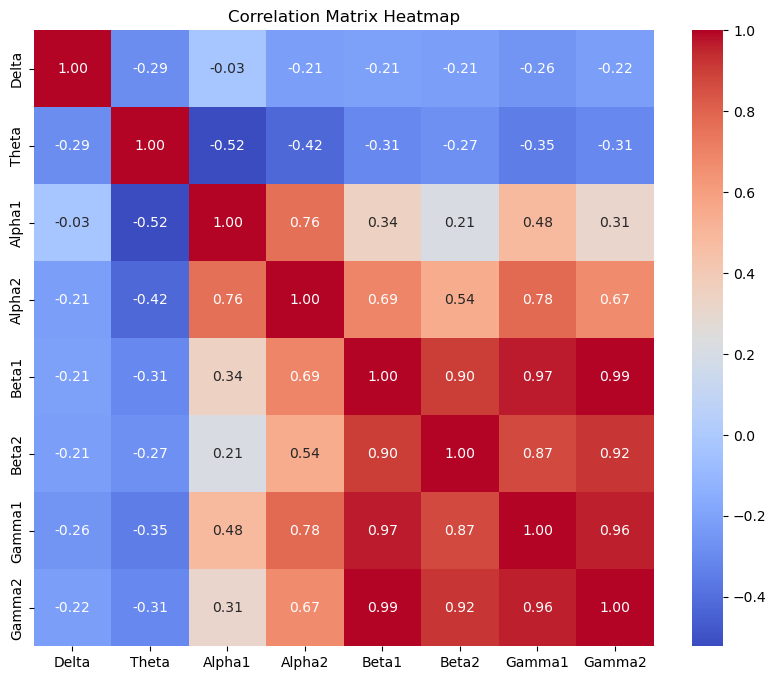

In [10]:
#计算相关系数和绘制相关性热力图
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_col = pd.read_excel("feature_results_power.xlsx")
df_corr = data.iloc[:, 2:10]  # 选择第2到第10列
correlation_matrix = df_corr.corr()


# 使用seaborn的heatmap函数绘制热力图
plt.figure(figsize=(10, 8))  # 可以根据需要调整图形大小
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')  # 标题
plt.show()